# R | kNN

## 1.9 토마토 kNN

### [문제12]
R을 이용해서 food.csv 읽어들인 후 토마토 단맛 6, 아삭한 맛 4를 이용해서 거리계산한 값을 dist 컬럼을 추가하고 dist 컬럼의 값을 기준으로 오름차순 순위 컬럼 rank를 생성하세요.

In [3]:
food <- read.csv("c:/data/food.csv", stringsAsFactors = FALSE, header = TRUE)
food$dist <- sqrt((food$sweetness - 6) ^ 2 + (food$crunchiness - 4) ^ 2)
food

ingredient,sweetness,crunchiness,class,dist
apple,10,9,Fruits,6.403124
bacon,1,4,Proteins,5.000000
banana,10,1,Fruits,5.000000
carrot,7,10,Vegetables,6.082763
celery,3,10,Vegetables,6.708204
cheese,1,1,Proteins,5.830952
cucumber,2,8,Vegetables,5.656854
fish,3,1,Proteins,4.242641
grape,8,5,Fruits,2.236068
green bean,3,7,Vegetables,4.242641


In [4]:
food[order(food$dist),]

,ingredient,sweetness,crunchiness,class,dist
13,orange,7,3,Fruits,1.414214
9,grape,8,5,Fruits,2.236068
12,nuts,3,6,Proteins,3.605551
15,shrimp,2,3,Proteins,4.123106
8,fish,3,1,Proteins,4.242641
10,green bean,3,7,Vegetables,4.242641
2,bacon,1,4,Proteins,5.000000
3,banana,10,1,Fruits,5.000000
14,pear,10,7,Fruits,5.000000
7,cucumber,2,8,Vegetables,5.656854


In [5]:
food$rank <- rank(food$dist, ties.method = 'min')
food

ingredient,sweetness,crunchiness,class,dist,rank
apple,10,9,Fruits,6.403124,13
bacon,1,4,Proteins,5.000000,7
banana,10,1,Fruits,5.000000,7
carrot,7,10,Vegetables,6.082763,12
celery,3,10,Vegetables,6.708204,14
cheese,1,1,Proteins,5.830952,11
cucumber,2,8,Vegetables,5.656854,10
fish,3,1,Proteins,4.242641,5
grape,8,5,Fruits,2.236068,2
green bean,3,7,Vegetables,4.242641,5


In [6]:
food[food$rank <= 3, 'class']

[1] "Fruits"   "Proteins" "Fruits"

In [7]:
table(food[food$rank <= 3, 'class'])


  Fruits Proteins 
       2        1 

In [8]:
names(head(sort(table(food[food$rank <= 3, 'class']),decreasing=TRUE),1))

[1] "Fruits"

In [14]:
tomato <- data.frame(ingredient="tomato", sweetness = 6, crunchiness = 4)

# install.packages('class')
library(class)

train <- food[,2:3]
train_label <- food[,4]
test <- tomato[,2:3]

knn(train, test, train_label, k=3)

[1] Fruits
Levels: Fruits Proteins Vegetables

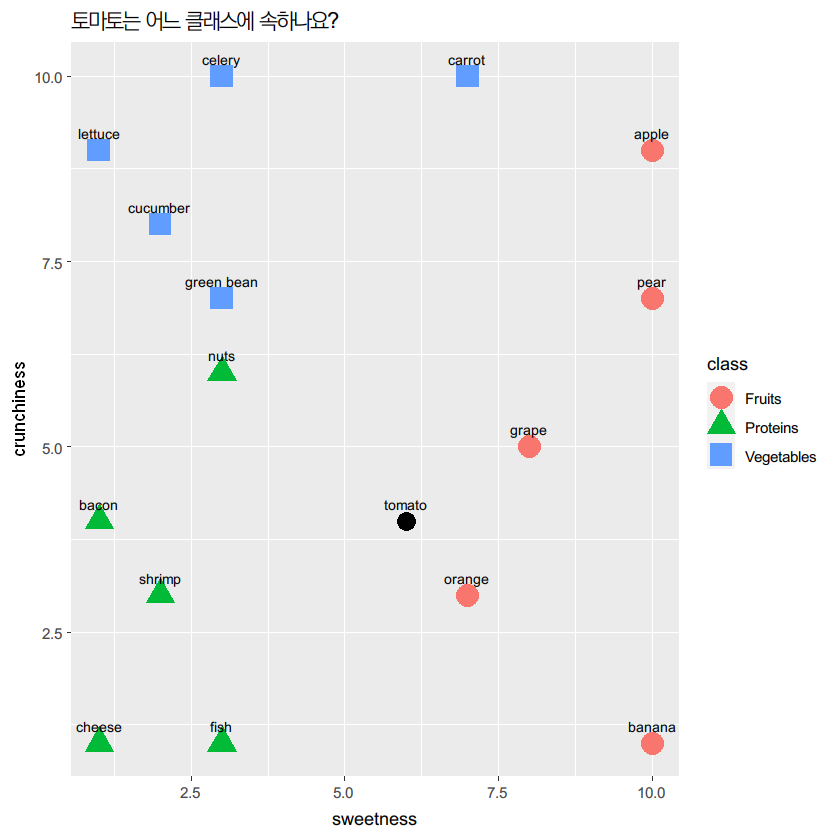

In [15]:
# install.packages('ggplot2')
library(ggplot2)

ggplot(data=food, aes(x=sweetness, y = crunchiness))+
  labs(title="토마토는 어느 클래스에 속하나요? ")+
  geom_point(aes(color=class, shape=class), size=6)+
  geom_text(aes(label=ingredient),vjust=-1, size = 3)+
  geom_point(data=tomato, colour='black', size = 5)+
  geom_text(data=tomato, aes(label=ingredient),vjust=-1, size = 3)

## 1.10 붓꽃 kNN

### [문제13]
붓꽃 데이터 입니다. kNN으로 분류해주세요.  
`SepalLength = 2.0`  
`SepalWidth = 7.0`  
`PetalLength = 1.0`  
`PetalWidth = 0.1`

In [3]:
iris <- read.csv("c:/data/iris.csv", stringsAsFactors = FALSE, header = TRUE)
iris_train <- iris[,1:4]
iris_train_label <- iris[,5]
iris_test <- data.frame(SepalLength = 2.0,
                        SepalWidth = 7.0,
                        PetalLength = 1.0,
                        PetalWidth = 0.1)
knn(iris_train, iris_test, iris_train_label, k=3)

[1] Iris-setosa
Levels: Iris-setosa Iris-versicolor Iris-virginica

### 6.2.1 feature scaling
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
- 표준화(standardization), 정규화(normalization)

In [4]:
normalize <- function(x){
  return ((x - min(x)) / (max(x) - min(x)))
}
 
standard <- function(x){
  return ((x-mean(x)))/(sd(x))
}

In [5]:
iris[,1:4] <- lapply(iris[,1:4],normalize)

### 6.2.2 학습 및 테스트 데이터 만들기

In [6]:
id <- sample(1:2, nrow(iris), replace=TRUE, prob=c(0.7,0.3))
table(id)

id
  1   2 
104  46 

In [7]:
iris_train <- iris[id == 1,1:4]
iris_train_label <- iris[id == 1,5]
iris_test <- iris[id == 2,1:4]
iris_test_label <- iris[id==2,5]
table(iris_train_label)

iris_train_label
    Iris-setosa Iris-versicolor  Iris-virginica 
             31              38              35 

In [8]:
table(iris_test_label)

iris_test_label
    Iris-setosa Iris-versicolor  Iris-virginica 
             19              12              15 

In [9]:
knn(iris_train, iris_test,iris_train_label, k=3)

[1] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [5] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
 [9] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
[13] Iris-setosa     Iris-setosa     Iris-setosa     Iris-setosa    
[17] Iris-setosa     Iris-setosa     Iris-setosa     Iris-versicolor
[21] Iris-versicolor Iris-versicolor Iris-versicolor Iris-versicolor
[25] Iris-virginica  Iris-versicolor Iris-virginica  Iris-versicolor
[29] Iris-versicolor Iris-versicolor Iris-versicolor Iris-virginica 
[33] Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
[37] Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
[41] Iris-virginica  Iris-virginica  Iris-virginica  Iris-virginica 
[45] Iris-virginica  Iris-virginica 
Levels: Iris-setosa Iris-versicolor Iris-virginica

In [11]:
iris_model <- knn(iris_train, iris_test,iris_train_label, k=3)
iris_model == iris_test_label

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[25] FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

### 6.2.3 혼동행렬 만들기

In [97]:
# install.packages("gmodels")
library(gmodels)
CrossTable(x=iris_test_label, y=iris_model, prop.chisq = FALSE)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  46 

 
                | iris_model 
iris_test_label |     Iris-setosa | Iris-versicolor |  Iris-virginica |       Row Total | 
----------------|-----------------|-----------------|-----------------|-----------------|
    Iris-setosa |              19 |               0 |               0 |              19 | 
                |           1.000 |           0.000 |           0.000 |           0.413 | 
                |           1.000 |           0.000 |           0.000 |                 | 
                |           0.413 |           0.000 |           0.000 |                 | 
----------------|-----------------|-----------------|-----------------|-----------------|
Iris-versicolor |               0 |              10 |               2 |              12 | 
                

2020-10-06

## 1.11 기타 실습
### [문제14]
R에서 emp.csv를 읽어들인 후 SAL_YN 컬럼을 추가한 후 값은 SALARY 값이 10000 이상이면 10000 이상, 아니면 10000 미만으로 입력해주세요.

In [14]:
library(gmodels)
emp <- read.csv("c:/data/emp.csv", header = T, stringsAsFactors = F)
emp$SAL_YN <- ifelse(emp$SALARY >= 10000, "10000이상","10000미만")

In [15]:
str(emp)

'data.frame':	107 obs. of  12 variables:
 $ EMPLOYEE_ID   : int  100 101 102 103 104 105 106 107 108 109 ...
 $ FIRST_NAME    : chr  "Steven" "Neena" "Lex" "Alexander" ...
 $ LAST_NAME     : chr  "King" "Kochhar" "De Haan" "Hunold" ...
 $ EMAIL         : chr  "SKING" "NKOCHHAR" "LDEHAAN" "AHUNOLD" ...
 $ PHONE_NUMBER  : chr  "515.123.4567" "515.123.4568" "515.123.4569" "590.423.4567" ...
 $ HIRE_DATE     : chr  "2003-06-17" "2005-09-21" "2001-01-13" "2006-01-03" ...
 $ JOB_ID        : chr  "AD_PRES" "AD_VP" "AD_VP" "IT_PROG" ...
 $ SALARY        : int  24000 17000 17000 9000 6000 4800 4800 4200 12008 9000 ...
 $ COMMISSION_PCT: num  NA NA NA NA NA NA NA NA NA NA ...
 $ MANAGER_ID    : int  NA 100 100 102 103 103 103 103 101 108 ...
 $ DEPARTMENT_ID : int  90 90 90 60 60 60 60 60 100 100 ...
 $ SAL_YN        : chr  "10000이상" "10000이상" "10000이상" "10000미만" ...


In [16]:
CrossTable(emp$JOB_ID, emp$SAL_YN)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  107 

 
             | emp$SAL_YN 
  emp$JOB_ID | 10000미만 | 10000이상 | Row Total | 
-------------|-----------|-----------|-----------|
  AC_ACCOUNT |         1 |         0 |         1 | 
             |     0.038 |     0.178 |           | 
             |     1.000 |     0.000 |     0.009 | 
             |     0.011 |     0.000 |           | 
             |     0.009 |     0.000 |           | 
-------------|-----------|-----------|-----------|
      AC_MGR |         0 |         1 |         1 | 
             |     0.822 |     3.809 |           | 
             |     0.000 |     1.000 |     0.009 | 
             |     0.000 |     0.053 |           | 
             |     0.000 |     0.009 |           | 
-------------|-----------|-----------|--------

### [문제15]
유방암 데이터입니다. kNN 알고리즘을 이용해서 훈련 데이터셋, 테스트 데이터셋을 이용해서 분류가 잘 되는지 확인하세요.

In [48]:
data <- read.csv("c:/data/wisc_bc_data.csv", header = T, stringsAsFactors = F)
str(data)

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : chr  "B" "B" "B" "B" ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  1

In [49]:
normalize <- function(x){
  return ((x - min(x)) / (max(x) - min(x)))
}
 
standard <- function(x){
  return ((x-mean(x)))/(sd(x))
}

In [50]:
data[,3:32] <- lapply(data[,3:32],normalize)
 
id <- sample(1:2, nrow(data), replace=TRUE, prob = c(0.7, 0.3))
data_train <- data[id == 1, 3:32]
data_train_label <- data[id==1, 2]
data_test <- data[id == 2, 3:32]
data_test_label <- data[id==2, 2]

In [51]:
library(class)
data_model <- knn(data_train,data_test,data_train_label, k=3)
 
CrossTable(x=data_test_label, y = data_model, prop.chisq = F)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  155 

 
                | data_model 
data_test_label |         B |         M | Row Total | 
----------------|-----------|-----------|-----------|
              B |        95 |         1 |        96 | 
                |     0.990 |     0.010 |     0.619 | 
                |     0.969 |     0.018 |           | 
                |     0.613 |     0.006 |           | 
----------------|-----------|-----------|-----------|
              M |         3 |        56 |        59 | 
                |     0.051 |     0.949 |     0.381 | 
                |     0.031 |     0.982 |           | 
                |     0.019 |     0.361 |           | 
----------------|-----------|-----------|-----------|
   Column Total |        98 |        57 |       155 | 
                |     0.632 |

In [52]:
# 훈련데이터, 테스트데이터 생성
library(caret)
 
idx <- createDataPartition(y=data$diagnosis, p=0.7, list=FALSE)
data <- data[-1]

wbcd_train <- data[idx,]
wbcd_test <- data[-idx,]
wbcd_train_labels <- wbcd_train$diagnosis
wbcd_test_labels <- wbcd_test$diagnosis

In [53]:
NROW(wbcd_train)

[1] 399

In [54]:
NROW(wbcd_test)

[1] 170

In [55]:
table(wbcd_train$diagnosis)


  B   M 
250 149 

In [56]:
table(wbcd_test$diagnosis)


  B   M 
107  63 

In [57]:
# 정확도
library(class)
wbcd_test_pred <- knn(train = wbcd_train[-1], test=wbcd_test[-1], wbcd_train_labels, k=5)
accuracy <- sum(wbcd_test_labels == wbcd_test_pred) / NROW(wbcd_test_labels)
accuracy

[1] 0.9764706

### [문제16]
k값 변화율에 따라 정확도를 시각화해주세요.

In [58]:
i = 1
wbcd_test_pred <- knn(train = wbcd_train[-1], test = wbcd_test[-1],
                     cl = wbcd_train_labels, k=i)
accuracy <- sum(wbcd_test_pred == wbcd_test_labels) / length(wbcd_test_labels)
result <- data.frame(i, accuracy)

In [59]:
accuracy

[1] 0.9647059

In [60]:
result

i,accuracy
1,0.9647059


In [61]:
for (i in seq(3,100,2)) {
    wbcd_test_pred <- knn(train = wbcd_train[-1], test = wbcd_test[-1],
                     cl = wbcd_train_labels, k=i)
    accuracy <- sum(wbcd_test_pred == wbcd_test_labels) / length(wbcd_test_labels)
    result <- rbind(result, data.frame(i, accuracy))
}

In [62]:
result

i,accuracy
1,0.9647059
3,0.9705882
5,0.9764706
7,0.9705882
9,0.9647059
11,0.9588235
13,0.9647059
15,0.9647059
17,0.9705882
19,0.9705882


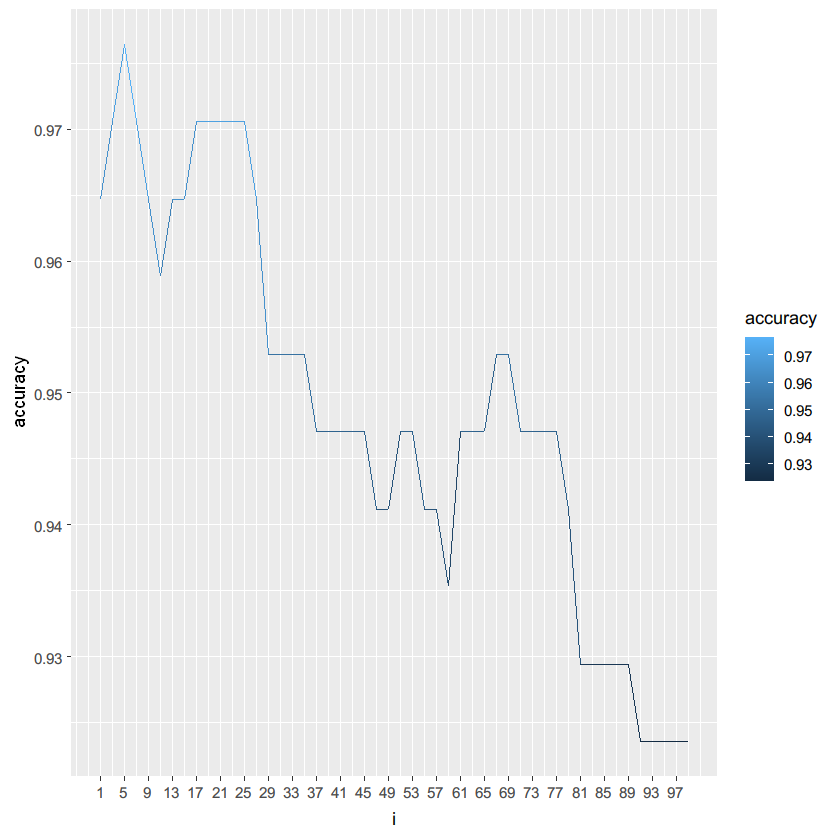

In [69]:
library(ggplot2)

ggplot(result, aes(x=i, y=accuracy))+
    geom_line(aes(color=accuracy))+
    scale_x_continuous(breaks = seq(1,100,4))

### [문제17]
모델의 정밀도, 재현율, F1점수 계산해주세요.

In [70]:
CrossTable(x=wbcd_test_labels, y = wbcd_test_pred, prop.chisq = F)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  170 

 
                 | wbcd_test_pred 
wbcd_test_labels |         B |         M | Row Total | 
-----------------|-----------|-----------|-----------|
               B |       105 |         2 |       107 | 
                 |     0.981 |     0.019 |     0.629 | 
                 |     0.905 |     0.037 |           | 
                 |     0.618 |     0.012 |           | 
-----------------|-----------|-----------|-----------|
               M |        11 |        52 |        63 | 
                 |     0.175 |     0.825 |     0.371 | 
                 |     0.095 |     0.963 |           | 
                 |     0.065 |     0.306 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       116 |        54 |       170 | 
           

In [71]:
# 정확도 (accuracy)
(105 + 52) / 170

[1] 0.9235294

In [72]:
# Benign 정밀도 (precision)
105 / (105 + 11)

[1] 0.9051724

In [73]:
# Malignant 정밀도 (precision)
52 / (52 + 2)

[1] 0.962963

In [74]:
# Benign 재현율 (recall)
105 / (105 + 2)

[1] 0.9813084

In [94]:
# Malignant 재현율 (recall)
52 / (52 + 11)

[1] 0.8253968

In [76]:
# Benign F1 점수
2 * 0.91 * 0.98 / (0.91 + 0.98)

[1] 0.9437037

In [96]:
# Malignant F1 점수
2 * 0.96 * 0.83 / (0.96 + 0.83)

[1] 0.8902793

In [79]:
library(caret)

In [90]:
# Benign 정밀도
posPredValue(wbcd_test_pred, as.factor(wbcd_test_labels), positive = "B")

[1] 0.9051724

In [89]:
# Malignant 정밀도
posPredValue(wbcd_test_pred, as.factor(wbcd_test_labels), positive = "M")

[1] 0.962963

In [91]:
# Benign 민감도, 재현율
sensitivity(wbcd_test_pred, as.factor(wbcd_test_labels), positive = "B")

[1] 0.9813084

In [92]:
# Malignant 민감도, 재현율
sensitivity(wbcd_test_pred, as.factor(wbcd_test_labels), positive = "M")

[1] 0.8253968